# CSE291E-FA22

## Problem 1: Deform a shape

In this problem, we will practice part of what we learned in the image-to-3D lecture for shape deformation.

### 1. Laplacian
Given a mesh $M=(V, E, F)$, we assume that the adjacency matrix is $A\in\mathbb{R}^{n\times n}$, $D\in\mathbb{R}^{n\times n}$ is a diagonal matrix where $D[i,i]$ is the degree of the $i$-th vertex. The Laplacian matrix is defined as $L=D-A$.

Prove that:

(a) $\sum_{(i,j)\in E}\|x_i-x_j\|^2=x^T L x$ for $x\in \mathbb{R}^n$. [1pt]

(b) $L\in\mathbb{S}^n_{+} $, i.e., $L$ is a symmetric and positive semi-definite matrix. [1pt]

(c) For the data matrix $P\in\mathbb{R}^{n\times 3}$ where each row corresponds to a point in $\mathbb{R}^3$, denote the columns of $P$ as $P=[x, y, z]$ and rows of $P$ as $P=[p_1^T; p_2^T; \ldots; p_n^T]$, show that 
$\sum_{(i,j)\in E}\|p_i-p_j\|^2=x^T L x+ y^T L y + z^T L z$. (hint: Use the conclusion from 1(a)) [1pt]

*solution*

### 2. Normalized Laplacian
Normalized Laplacian is defined as the normalized version of the Laplacian matrix above: $$L_{norm} = D^{-1} L$$

(a) Prove that the sum of each row of $L_{norm}$ is 0. [1pt]

$D^{-1} = diag(\frac{1}{d_1}, \frac{1}{d_2}, ..., \frac{1}{d_n})$. Denote $A = [\vec{a_1}, \vec{a_2}, ..., \vec{a_n}]$. $D^{-1}A = [\frac{1}{d_1}\vec{a_1}, \frac{1}{d_2}\vec{a_2}, ..., \frac{1}{d_n}\vec{a_n}]$

$$L_{norm} = D^{-1}(D-A) = I - D^{-1}A = [\vec{I_1} - \frac{1}{d_1}\vec{a_1}, \vec{I_2} - \frac{1}{d_2}\vec{a_2}, ..., \vec{I_n} - \frac{1}{d_n}\vec{a_n}] $$

Where $I$ denotes the $n*n$ identity matrix. $I_i$ denotes the ith row of $I$.

Denote $L_i = \vec{I_i} - \frac{1}{d_i} \vec{a_i}, i \in \{1, 2,..., n\}$. Since by definition $deg(p_i) = d_i$, we have:

$$\sum^{n}_{j=1}{L_{ij}} = 1 - \frac{1}{d_i} \sum_{k=1}^{d_i}{1} = 1-1 = 0$$

So the sum of each row of $L_{norm}$ is 0. Proved.



(b) The difference between a vertex $x$ and the average position of its 1-ring neighborhood is a quantity that provides interesting geometric insight of the shape. It can be shown that, 
$$x-\frac{1}{|N(x)|}\sum_{y_i\in N(x)} y_i \approx H \vec n \Delta A$$
for a good mesh, where $N(x)$ is the 1-ring neighorhood vertices of $x$ by the mesh topology, $H=\frac{1}{2}(\kappa_{min}+\kappa_{\max})$ is the mean curvature at $x$ (in the sense of the underlying continuous surface being approximated), $\vec n$ is the surface normal vector at $x$, and $\Delta A$ is a quantity proportional to the total area of the 1-ring fan (triangles formed by $x$ and vertices along the 1-ring).

Define $\Delta p_i := p_i-\frac{1}{|N(p_i)|}\sum_{p_j\in N(p_i)} p_j$. Prove that $\Delta p_i = [L_{norm} P]_i$, where $P$ and $p_i$ are defined as in 1(c), and $[X]_i$ is to access the $i$-th row of $X$. [1pt]

$$
\begin{aligned}
L_{norm} P &= (I-D^{-1}A)P \\
            &= P - D^{-1}AP \\
            &= [p_1, p_2,..., p_n] - [\frac{1}{d_1}\vec{a_1}P, \frac{1}{d_2}\vec{a_2}P, ..., \frac{1}{d_n}\vec{a_n}P] \\
            &= [p_1-\frac{1}{d_1}\vec{a_1}P, p_2-\frac{1}{d_2}\vec{a_2}P,..., p_n-\frac{1}{d_n}\vec{a_n}P] 
\end{aligned}
$$

For the ith row of the above column vector, and from the fact that $d_i = |N(p_i)|$ by definition of vertex degree, we have:

$$
\begin{aligned} 
[L_{norm}P]_i &= p_i-\frac{1}{d_i}\vec{a_i}P \\
            &= p_i-\frac{1}{| N(p_i) |}\vec{a_i} [p_1, p_2,..., p_n] \quad (1)
\end{aligned}
$$

Since 
$$(\vec{a_i})_j = \left\{ \\
\begin{aligned} 
& 1, \quad p_j \in N(p_i) \\
& 0, \quad otherwise \\
\end{aligned}
\right.
$$

We can further simplify $(1)$ to:

$$
\begin{aligned}
p_i-\frac{1}{| N(p_i) |}\vec{a_i} [p_1, p_2,..., p_n] 
&= p_i-\frac{1}{| N(p_i) |} \sum_{p_j \in N(p_i)}{p_j} \\
&= \Delta {p_i} \\
\end{aligned}
$$

Hence, $[L_{norm}P]_i = \Delta {p_i}$ proved.




### 3. Shape Deformation (extra credit)
Please load the source.obj and target.obj files using the trimesh library of Python, and optimize to deform the vertices of the source.obj to match target.obj. Plot the source object, target object, and deformed object. [5pt]

(a) Chamfer-only loss

*Your solution*

(b) Curvature and normal-based loss

*Your solution*

## Problem 2: ICP

In [3]:
"""Visualization utilies."""

# You can use other visualization from previous homeworks, like Open3D
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def show_points(points):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points[:, 0], points[:, 2], points[:, 1])
    

def compare_points(points1, points2):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim3d([-2, 2])
    ax.set_ylim3d([-2, 2])
    ax.set_zlim3d([0, 4])
    ax.scatter(points1[:, 0], points1[:, 2], points1[:, 1])
    ax.scatter(points2[:, 0], points2[:, 2], points2[:, 1])

In [4]:
"""Load data."""

import trimesh
import numpy as np

source_pcd = trimesh.load("banana.source.ply").vertices
target_pcd = trimesh.load("banana.target.ply").vertices
gt_T = np.loadtxt("banana.pose.txt")
print(source_pcd.shape)
print(target_pcd.shape)
print(len(target_pcd))
a=np.array([ [1,1,1,1], [2,2,2,1], [3,2,1,4] ])
print((a))
a[:,0], a[:,1] = a[:,1], a[:,0]
print(a)
# print(2*a)
# print(np.mean(a, axis=0))
# print(np.zeros(3))
print(a+np.ones(4))

(16384, 3)
(16384, 3)
16384
[[1 1 1 1]
 [2 2 2 1]
 [3 2 1 4]]
[[1 1 1 1]
 [2 2 2 1]
 [2 2 1 4]]
[[2. 2. 2. 2.]
 [3. 3. 3. 2.]
 [3. 3. 2. 5.]]


In [128]:
"""Implement your own ICP."""
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import NearestNeighbors
# # def compute_corr(source_pcd, target_pcd):
# #     """
# #     Compute src tg pcd correspondances
# #     """
# #     return corr


def oneNN(source_pcd, target_pcd):
    '''
    Map source_pcd to nearest neighbour in target_pcd
    Input:
        source_pcd: Nx3 array of points
        target_pcd: Nx3 array of points
    Output:
        dists: Euclidean distances of the nearest neighbor
        inds: target_pcd indices of the nearest neighbor
    '''
    neigh = NearestNeighbors(n_neighbors=1)
    neigh.fit(target_pcd)
    dists, inds = neigh.kneighbors(source_pcd, return_distance=True)
    return dists.ravel(), inds.ravel()



def getRT(source_pcd, target_pcd):
    """
    Get R, t, given source pcd and aligned target pcd
    """
    # Get R, t (by Umeyama's minimization of distance)
    N = source_pcd.shape[0]
    qbar = np.mean(target_pcd, axis=0)
    pbar = np.mean(source_pcd, axis=0)
    # print(qbar, pbar)
    # Q, P = (target_pcd).T , (source_pcd).T 
    # M = N * np.outer(pbar, qbar)
    # M = (target_pcd-qbar).T @ (source_pcd-pbar)
    M = (target_pcd-qbar).T @ (source_pcd-pbar)
    U, D, VT = np.linalg.svd(M) 
    
    R = U @ VT
    if (np.linalg.det(R)<0):
        VT[-1,:] *= -1
        R = U @ VT  
    
    t = qbar - (R @ pbar)
    return R, t

def icp(source_pcd, target_pcd):
    """Iterative closest point.
    
    Args:
        source_pcd (np.ndarray): [N1, 3]
        target_pcd (np.ndarray): [N2, 3]
    
    Returns:
        np.ndarray: [4, 4] rigid transformation to align source to target.
    """
    T = np.eye(4)
    R, t = np.eye(3), np.zeros(3)
    N = source_pcd.shape[0]
    source_pcd_cp = source_pcd.copy()

    # Implement your own algorithm here.
    nsteps = 50
    for i in tqdm(range(nsteps)):
        # Update correspondance (by re-aligning target)
        distances, indices = oneNN(source_pcd, target_pcd)
        # Umayama's algo for getting R, t
        R, t = getRT(source_pcd, target_pcd[indices, :])
        source_pcd = source_pcd @ R.T + t

    R, t = getRT(source_pcd_cp, source_pcd)
    T[:3, :3], T[:3, -1] = R, t
    # print("Final T:")
    # print(T)
    return T
















100%|██████████| 50/50 [00:03<00:00, 13.75it/s]


GT T:
[[ 0.04139069 -0.12505186  0.99128646  1.14856815]
 [-0.15543338  0.9792519   0.13002374  1.55152014]
 [-0.98697886 -0.15946078  0.02109468  0.44714717]
 [ 0.          0.          0.          1.        ]]
pred T:
[[-0.01745829 -0.47044433 -0.88225696  1.09918992]
 [ 0.09560583  0.87756275 -0.46983311  1.53391101]
 [ 0.99526616 -0.09255139  0.02965648  0.46918099]
 [ 0.          0.          0.          1.        ]]
rre=179.74124617759884, rte=0.05686634703673097


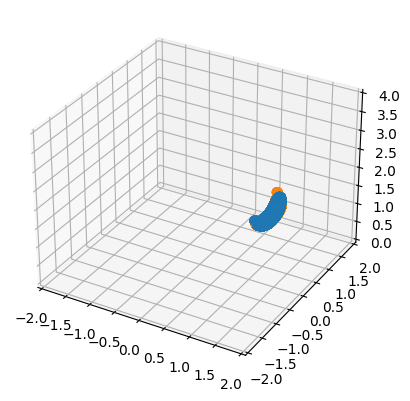

In [129]:
"""Metric and visualization."""

def compute_rre(R_est: np.ndarray, R_gt: np.ndarray):
    """Compute the relative rotation error (geodesic distance of rotation)."""
    assert R_est.shape == (3, 3), 'R_est: expected shape (3, 3), received shape {}.'.format(R_est.shape)
    assert R_gt.shape == (3, 3), 'R_gt: expected shape (3, 3), received shape {}.'.format(R_gt.shape)
    # relative rotation error (RRE)
    # Rotational degree loss (not objective of optimization)
    rre = np.arccos(np.clip(0.5 * (np.trace(R_est.T @ R_gt) - 1), -1.0, 1.0))
    return rre


def compute_rte(t_est: np.ndarray, t_gt: np.ndarray):
    assert t_est.shape == (3,), 't_est: expected shape (3,), received shape {}.'.format(t_est.shape)
    assert t_gt.shape == (3,), 't_gt: expected shape (3,), received shape {}.'.format(t_gt.shape)
    # relative translation error (RTE)
    rte = np.linalg.norm(t_est - t_gt) # Resembling MSE loss
    return rte


# Visualization
T = icp(source_pcd, target_pcd)
# T = np.eye(4)
print("GT T:")
print(gt_T)
print("pred T:")
print(T)
rre = np.rad2deg(compute_rre(T[:3, :3], gt_T[:3, :3]))
rte = compute_rte(T[:3, 3], gt_T[:3, 3])
print(f"rre={rre}, rte={rte}")
compare_points(source_pcd @ T[:3, :3].T + T[:3, 3], target_pcd)